In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import set_config
set_config(print_changed_only=False)

# Kickstarter Project #

* Kickstarter adalah sebuah perusahaan fintech yang bergerak pada bidang reward crowdfunding. Kickstarter memberi kesempatan kepada banyak orang untuk memulai proyek yang ingin mereka bangun tetapi terhambat masalah dana. Pendana atau yang dipanggil Backers umumnya akan mendapatkan sebuah reward berupa early access, produk gratis, ataupun reward lainnya.

# Problem

* Karena Kickstarter sudah mulai dikenal banyak orang, membuat sangat banyak orang yang ingin proyek mereka akan terdanai sama dengan proyek-proyek yang telah launching berkat kickstarter. Sayangnya, tidak semua terdanai sesuai harapan, yang dikhawatirkan adalah persentase proyek yang berhasil akan terus tergerus oleh proyek yang tidak.

# Goal

* Pada kesempatan kali ini saya akan mencoba untuk menganlisa sebuah data tentang proyek-proyek yang terdaftar di situs Kickstarter. Menganalisa dan mencari tahu apa yang bisa dilakukan untuk menambah persentase keberhasilan dan juga membuat sebuah model prediksi apakah proyek yang akan dipublikasikan akan terdanai atau tidak.

In [4]:
df1=pd.read_csv('ks-projects-201612.csv', engine='python')
df2=pd.read_csv('train.csv')

In [5]:
df1.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [6]:
df1= df1.rename(columns={'name ': 'name'})

In [7]:
df1.shape

(323750, 17)

In [8]:
df2.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

In [9]:
df2.shape

(108129, 14)

In [10]:
df=pd.merge(df1, df2, on='name')

* ['kaggle-Kickstarter']('https://www.kaggle.com/kemical/kickstarter-projects')

* ['kaggle-Kickstarter-2']('https://www.kaggle.com/codename007/funding-successful-projects')

* I try to joining 2 datasets from 2 different page on Kaggle.

In [11]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,...,where-is-hank,False,US,USD,1361834450,1361834450,1357603284,1357946450,3,0
1,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500,2013-09-09 18:19:37,0,failed,...,of-jesus-and-madmen,False,CA,CAD,1381335577,1381335577,1378130153,1378743577,0,0
2,1000064918,The Beard,Comic Books,Comics,USD,2014-11-08 22:27:52,1500,2014-10-09 22:27:52,395,failed,...,the-beard,False,US,USD,1415482072,1415482072,1412172842,1412886472,16,0
3,1000068480,Notes From London: Above & Below,Art Books,Publishing,USD,2015-05-10 21:20:54,3000,2015-04-10 21:20:54,789,failed,...,notes-from-london-above-and-below,False,US,USD,1431285654,1431285655,1428526605,1428693654,20,0
4,1000087442,Mountain brew: A quest for alcohol sustainability,Drinks,Food,NOK,2015-02-25 19:17:33,500,2015-01-26 19:17:33,48,failed,...,mountain-brew-a-quest-for-alcohol-sustainability,False,NO,NOK,1424888253,1424888253,1422045831,1422296253,3,0


In [12]:
df.columns

Index(['ID ', 'name', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'project_id', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

In [13]:
df.isna().sum()

ID                            0
name                         12
category                      0
main_category                 0
currency                      0
deadline                      0
goal                          0
launched                      0
pledged                       0
state                         0
backers                       0
country                       0
usd pledged                 244
Unnamed: 13              102296
Unnamed: 14              102302
Unnamed: 15              102302
Unnamed: 16              102302
project_id                    0
desc                         38
goal                          0
keywords                      0
disable_communication         0
country                       0
currency                      0
deadline                      0
state_changed_at              0
created_at                    0
launched_at                   0
backers_count                 0
final_status                  0
dtype: int64

In [14]:
df.corr()

,ID,Unnamed: 16,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
ID,1.000000,NaN,0.000794,0.002815,-0.002322,-0.002385,-0.003373,-0.002326,0.000466,-0.000643
Unnamed: 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goal,0.000794,NaN,1.000000,-0.000655,0.020535,0.020215,0.019985,0.019948,0.009259,-0.019116
disable_communication,0.002815,NaN,-0.000655,1.000000,0.046816,0.044060,0.048996,0.046565,-0.003453,-0.038227
deadline,-0.002322,NaN,0.020535,0.046816,1.000000,0.999926,0.983909,0.999671,0.002374,-0.127966
state_changed_at,-0.002385,NaN,0.020215,0.044060,0.999926,1.000000,0.983827,0.999636,0.002603,-0.126473
created_at,-0.003373,NaN,0.019985,0.048996,0.983909,0.983827,1.000000,0.984363,-0.001944,-0.131623
launched_at,-0.002326,NaN,0.019948,0.046565,0.999671,0.999636,0.984363,1.000000,0.002451,-0.124845
backers_count,0.000466,NaN,0.009259,-0.003453,0.002374,0.002603,-0.001944,0.002451,1.000000,0.118597
final_status,-0.000643,NaN,-0.019116,-0.038227,-0.127966,-0.126473,-0.131623,-0.124845,0.118597,1.000000


In [15]:
df=df.drop(columns=['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','ID ','project_id'])

* Drop Column with many missing value, Drop id and Project ID

In [16]:
df.shape

(102302, 24)

In [17]:
df.dropna()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,...,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,...,where-is-hank,False,US,USD,1361834450,1361834450,1357603284,1357946450,3,0
1,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500,2013-09-09 18:19:37,0,failed,0,...,of-jesus-and-madmen,False,CA,CAD,1381335577,1381335577,1378130153,1378743577,0,0
2,The Beard,Comic Books,Comics,USD,2014-11-08 22:27:52,1500,2014-10-09 22:27:52,395,failed,16,...,the-beard,False,US,USD,1415482072,1415482072,1412172842,1412886472,16,0
3,Notes From London: Above & Below,Art Books,Publishing,USD,2015-05-10 21:20:54,3000,2015-04-10 21:20:54,789,failed,20,...,notes-from-london-above-and-below,False,US,USD,1431285654,1431285655,1428526605,1428693654,20,0
4,Mountain brew: A quest for alcohol sustainability,Drinks,Food,NOK,2015-02-25 19:17:33,500,2015-01-26 19:17:33,48,failed,3,...,mountain-brew-a-quest-for-alcohol-sustainability,False,NO,NOK,1424888253,1424888253,1422045831,1422296253,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102297,AT THE BEACH,Classical Music,Music,CAD,2014-03-22 00:00:16,5000,2014-02-20 01:00:16,5501,successful,78,...,at-the-beach,False,CA,CAD,1395442816,1395442818,1390929074,1392854416,78,1
102298,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20 03:46:07,5500,2014-08-06 03:46:07,0,canceled,0,...,angelas-poetry,False,CA,CAD,1411177567,1407292187,1407065500,1407289567,0,0
102299,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,...,the-tribe,False,US,USD,1311039314,1311039316,1308165288,1308706514,5,0
102300,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,...,walls-of-remedy-new-lesbian-romantic-comedy-fe...,False,US,USD,1281931140,1281931226,1277507755,1278006030,1,0


In [18]:
df.duplicated().sum()

0

In [19]:
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'],unit='s')

df['deadline'] = pd.to_datetime(df['deadline'],unit='s')

df['created_at'] = pd.to_datetime(df['created_at'],unit='s')

df['launched_at'] = pd.to_datetime(df['launched_at'],unit='s')

* Change Unix time format Column to Easier to read time format

In [20]:
df=df.drop(columns='keywords')

In [21]:
df=df.drop(columns=['deadline ','launched ','state ','currency ', 'goal ','backers ','country '])

* Drop duplicate Column from joining datasets

In [22]:
df.dtypes

name                             object
category                         object
main_category                    object
pledged                          object
usd pledged                      object
desc                             object
goal                            float64
disable_communication              bool
country                          object
currency                         object
deadline                 datetime64[ns]
state_changed_at         datetime64[ns]
created_at               datetime64[ns]
launched_at              datetime64[ns]
backers_count                     int64
final_status                      int64
dtype: object

In [23]:
df['deadline'] = pd.to_datetime(df['deadline']).dt.floor('d')

df['state_changed_at'] = pd.to_datetime(df['state_changed_at']).dt.floor('d')

df['launched_at'] = pd.to_datetime(df['launched_at']).dt.floor('d')

df['created_at'] = pd.to_datetime(df['created_at']).dt.floor('d')

* Deleting M-H-S from time

In [24]:
df

,name,category,main_category,pledged,usd pledged,desc,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,Where is Hank?,Narrative Film,Film & Video,220,220,"Abandoned Property. Sounds of struggle, muffle...",45000.0,False,US,USD,2013-02-25,2013-02-25,2013-01-08,2013-01-11,3,0
1,Of Jesus and Madmen,Nonfiction,Publishing,0,0,This is an autobiography of my personal experi...,2500.0,False,CA,CAD,2013-10-09,2013-10-09,2013-09-02,2013-09-09,0,0
2,The Beard,Comic Books,Comics,395,395,'The beard' is a comedy based comic about an a...,1500.0,False,US,USD,2014-11-08,2014-11-08,2014-10-01,2014-10-09,16,0
3,Notes From London: Above & Below,Art Books,Publishing,789,789,Notes From London: Above & Below is an unusual...,3000.0,False,US,USD,2015-05-10,2015-05-10,2015-04-08,2015-04-10,20,0
4,Mountain brew: A quest for alcohol sustainability,Drinks,Food,48,6.18000816,This is the start of an exiting venture of bre...,500.0,False,NO,NOK,2015-02-25,2015-02-25,2015-01-23,2015-01-26,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102297,AT THE BEACH,Classical Music,Music,5501,5019.92088197,Recording a second CD with original piano musi...,5000.0,False,CA,CAD,2014-03-21,2014-03-21,2014-01-28,2014-02-20,78,1
102298,Angela's Poetry (Canceled),Poetry,Publishing,0,0,A collection of poems that I have written over...,5500.0,False,CA,CAD,2014-09-20,2014-08-06,2014-08-03,2014-08-06,0,0
102299,The Tribe,Narrative Film,Film & Video,155,155,Teenage outcasts come together to form a 60’s ...,1500.0,False,US,USD,2011-07-19,2011-07-19,2011-06-15,2011-06-22,5,0
102300,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,20,20,"A feature film about life, love, sex, and lesb...",15000.0,False,US,USD,2010-08-16,2010-08-16,2010-06-25,2010-07-01,1,0


In [25]:
df['Create_Launched']=df['launched_at']-df['created_at']

df['Launched_Changed']=df['state_changed_at']-df['launched_at']

df['Launched_Deadline']=df['deadline']-df['launched_at']

df['Changed_Deadline']=df['deadline']-df['state_changed_at']

* Create new column from existing time column.

In [26]:
df['launched_at'] = df['launched_at'].astype('str')

df['Create_Launched'] = df['Create_Launched'].astype('str')

df['Launched_Changed'] = df['Launched_Changed'].astype('str')

df['Launched_Deadline'] = df['Launched_Deadline'].astype('str')

df['Changed_Deadline'] = df['Changed_Deadline'].astype('str')

In [27]:
df['year'] = df['launched_at'].str[0:4]

In [28]:
df['Create_Launched'] = df['Create_Launched'].str.replace(r'\D', '')
df['Launched_Changed'] = df['Launched_Changed'].str.replace(r'\D', '')
df['Launched_Deadline'] = df['Launched_Deadline'].str.replace(r'\D', '')
df['Changed_Deadline'] = df['Changed_Deadline'].str.replace(r'\D', '')

* Removing word from time column

In [29]:
df['Create_Launched'] = df['Create_Launched'].astype('int')
df['Launched_Changed'] = df['Launched_Changed'].astype('int')
df['Launched_Deadline'] = df['Launched_Deadline'].astype('int')
df['Changed_Deadline'] = df['Changed_Deadline'].astype('int')

In [30]:
df.dtypes

name                             object
category                         object
main_category                    object
pledged                          object
usd pledged                      object
desc                             object
goal                            float64
disable_communication              bool
country                          object
currency                         object
deadline                 datetime64[ns]
state_changed_at         datetime64[ns]
created_at               datetime64[ns]
launched_at                      object
backers_count                     int64
final_status                      int64
Create_Launched                   int32
Launched_Changed                  int32
Launched_Deadline                 int32
Changed_Deadline                  int32
year                             object
dtype: object

In [31]:
df.describe()

,goal,backers_count,final_status,Create_Launched,Launched_Changed,Launched_Deadline,Changed_Deadline
count,1.023020e+05,102302.000000,102302.000000,102302.000000,102302.000000,102302.000000,102302.000000
mean,3.671938e+04,127.020019,0.316387,37.537389,32.884127,34.031847,1.155481
std,9.473126e+05,1207.643485,0.465068,86.419114,13.518480,12.785987,5.945487
min,1.000000e-02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000e+03,2.000000,0.000000,3.000000,30.000000,30.000000,0.000000
50%,5.000000e+03,16.000000,0.000000,10.000000,30.000000,30.000000,0.000000
75%,1.400000e+04,65.000000,1.000000,33.000000,35.000000,36.000000,0.000000
max,1.000000e+08,219382.000000,1.000000,1869.000000,354.000000,92.000000,295.000000


In [32]:
df.describe(include='O')

,name,category,main_category,pledged,usd pledged,desc,country,currency,launched_at,year
count,102290,102302,102302,102302,102058,102264,102302,102302,102302,102302
unique,99869,163,18,26879,37464,99468,11,9,2160,7
top,New EP/Music Development,Video Games,Film & Video,0,0,Breakout Artist Management has offered to work...,US,USD,2014-07-09,2014
freq,287,5127,19017,12486,12447,267,86301,86301,522,36478


In [33]:
df['currency'].value_counts()

USD    86301
GBP     8721
CAD     3736
AUD     1854
EUR      807
NZD      345
SEK      240
DKK      191
NOK      107
Name: currency, dtype: int64

In [34]:
goal_usd=[]
for i in df['currency']:
    if i == 'GBP':
        c= 0.75
    if i == 'USD':
        c= 1
    if i == 'CAD':
        c=1.3
    if i == 'AUD':
        c=1.37
    if i == 'EUR':
        c=0.82
    if i =='NZD':
        c=1.45
    if i == 'SEK':
        c=8.64
    if i == 'DKK':
        c=6.32
    if i == 'NOK':
        c= 9.02
    goal_usd.append(c)

In [35]:
df['goal_usd']=goal_usd
df['goal_usd']=df['goal'] / df['goal_usd']

In [36]:
df.to_csv("Clean_KS_with_outlier.csv", index=False)

In [37]:
df.columns

Index(['name', 'category ', 'main_category ', 'pledged ', 'usd pledged ',
       'desc', 'goal', 'disable_communication', 'country', 'currency',
       'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'backers_count', 'final_status', 'Create_Launched', 'Launched_Changed',
       'Launched_Deadline', 'Changed_Deadline', 'year', 'goal_usd'],
      dtype='object')

* Name : the name of Project.
* Category : Category for each project.
* Main Category :  Mother of Category.
* Pledged : How much Backers backing (count by money).
* Goal : project target amount.
* Disable Communication : Does the project owner disable communication with backers or not.
* Country : Location of the project owner's country.
* Currency : The type of currency project owners use in the projects they post.
* Deadline : The time when the project ends and can no longer be backed.
* State changed: The time when a project's status changes, be it canceled, successful, failed, or whatever.
* Create at : the time a project owner tries to post their project.
* Launched at : when the project is actually published.
* Backers count: Count of backers each project.
* final status : final state of the project.

In [38]:
df['goal_usd'].describe()

count    1.023020e+05
mean     3.511256e+04
std      8.720726e+05
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.333333e+04
max      1.000000e+08
Name: goal_usd, dtype: float64

<AxesSubplot:xlabel='final_status', ylabel='goal_usd'>

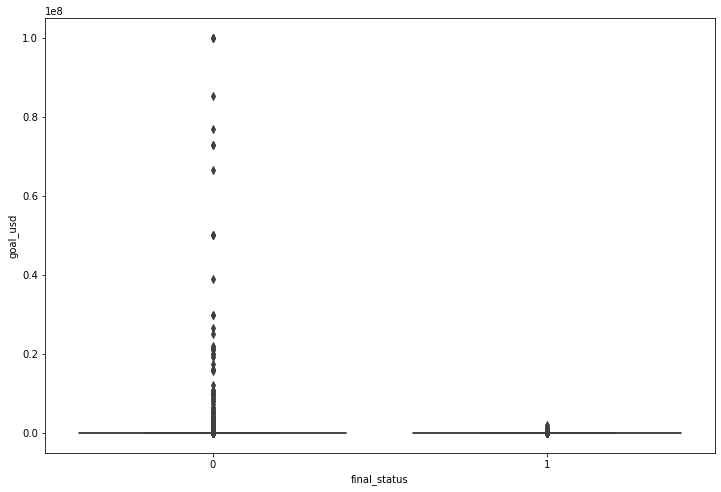

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df['final_status'], y = df['goal_usd'])

<AxesSubplot:xlabel='final_status', ylabel='goal_usd'>

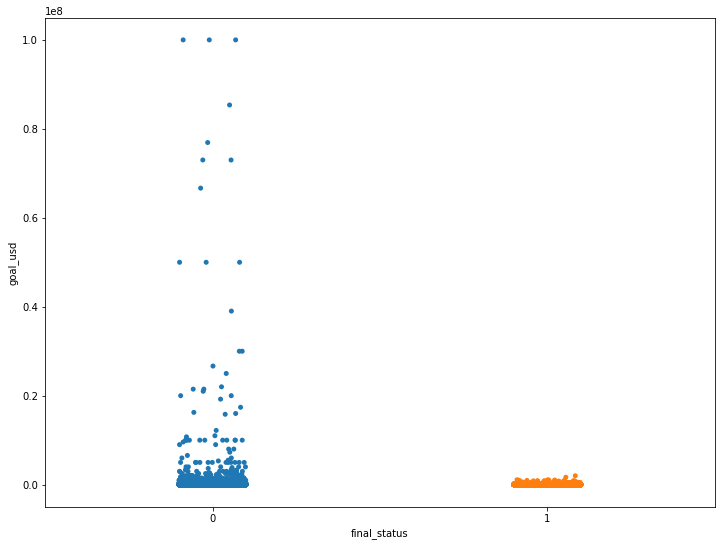

In [40]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'final_status', y = 'goal_usd', data = df)

In [41]:
df=df[df['goal_usd']<= 500000]

* Dropping Outliers, so Machine learning work properly and not making easy decision for fail state

<AxesSubplot:xlabel='final_status', ylabel='Changed_Deadline'>

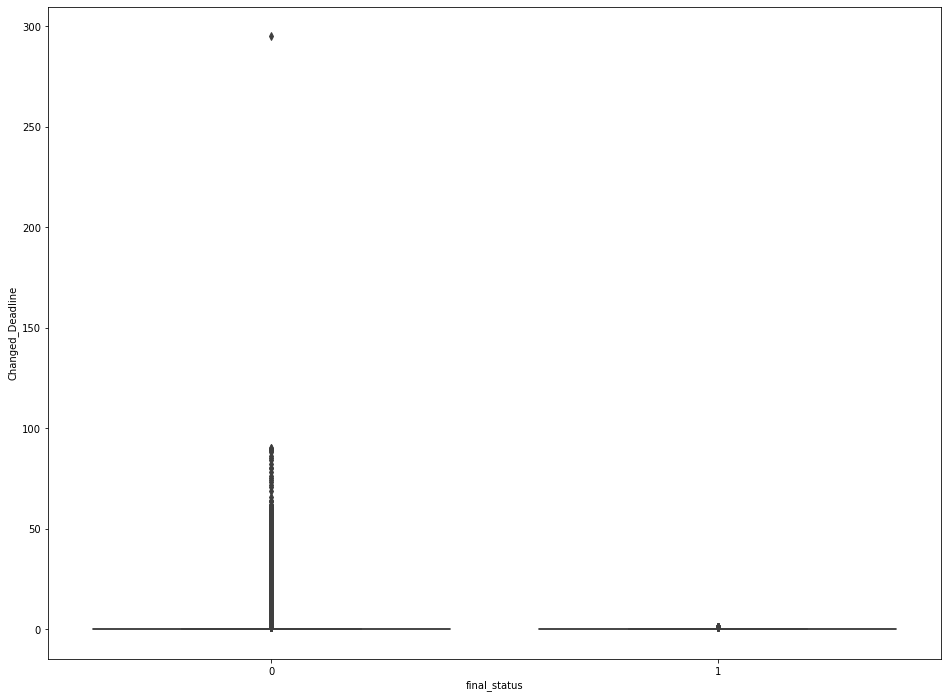

In [42]:
plt.figure(figsize=(16,12))
sns.boxplot(x = df['final_status'], y = df['Changed_Deadline'])

<AxesSubplot:xlabel='final_status', ylabel='Changed_Deadline'>

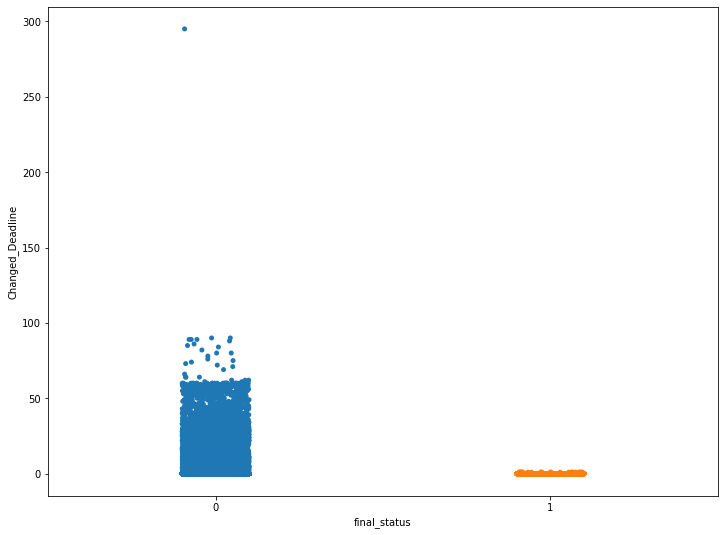

In [43]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'final_status', y = 'Changed_Deadline', data = df)

In [44]:
df=df[df['Changed_Deadline'] <= 50]

* Dropping outliers because there's some project owners changing their project to fast. Maybe they just cancel it

In [45]:
df.shape

(101532, 22)

<AxesSubplot:xlabel='final_status', ylabel='Launched_Deadline'>

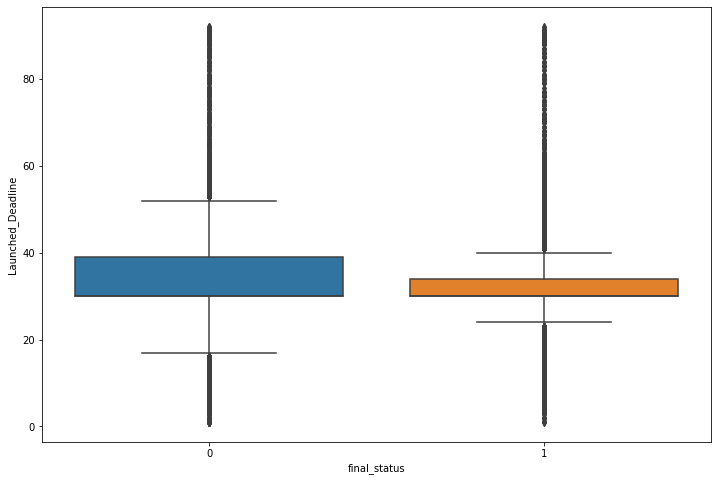

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df['final_status'], y = df['Launched_Deadline'])

<AxesSubplot:xlabel='final_status', ylabel='Launched_Deadline'>

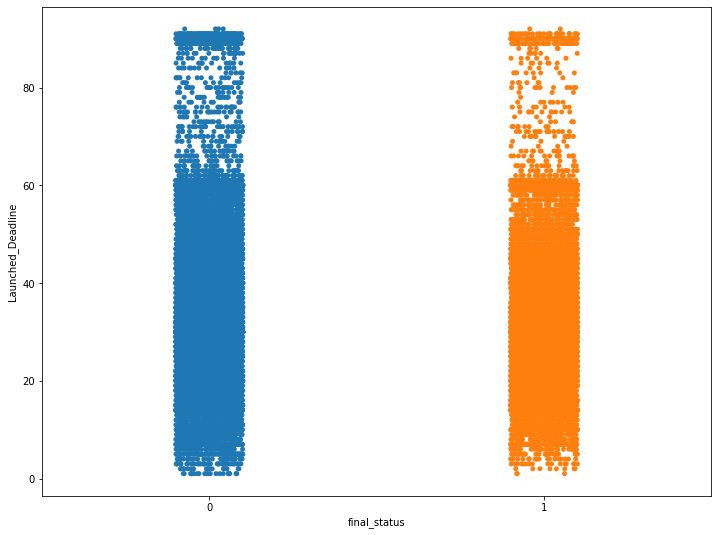

In [47]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'final_status', y = 'Launched_Deadline', data = df)

In [48]:
df['year'].value_counts()

2014    36109
2013    17631
2015    17486
2012    16833
2011     9475
2010     3461
2009      537
Name: year, dtype: int64

In [49]:
df['year']=df['year'].astype(int)

df=df[df['year']>2011]

df=df[df['Launched_Deadline']<=60]

* Since 2011 maximum duratin of deadline is 60 days
* [Source](https://www.kickstarter.com/blog/shortening-the-maximum-project-length)

<AxesSubplot:xlabel='final_status', ylabel='Create_Launched'>

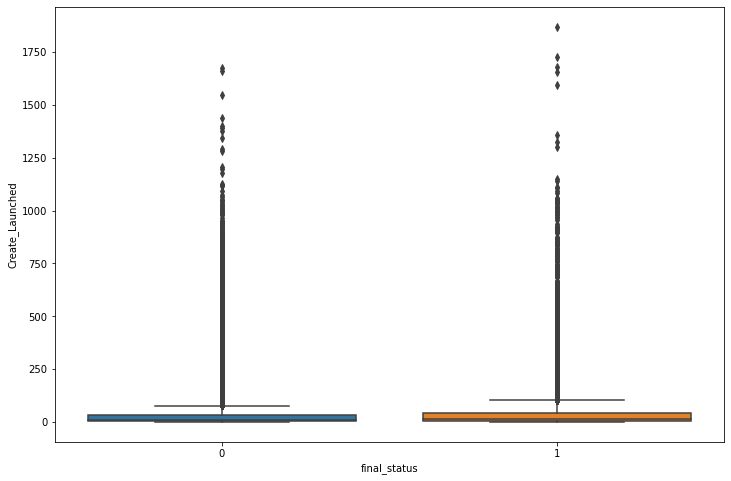

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df['final_status'], y = df['Create_Launched'])

<AxesSubplot:xlabel='final_status', ylabel='Create_Launched'>

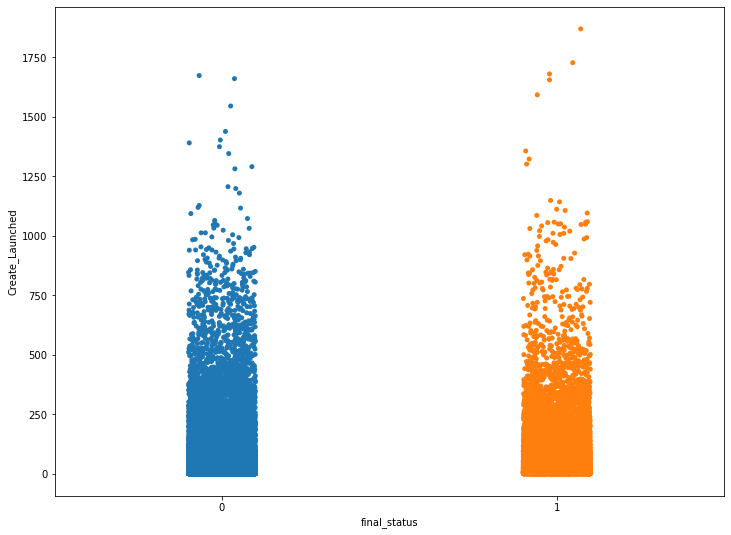

In [51]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'final_status', y = 'Create_Launched', data = df)

In [52]:
df=df[df['Create_Launched']<= 750]

* Take out a few outliers, taking the initial conditions when each status starts to make a difference

<AxesSubplot:xlabel='final_status', ylabel='Launched_Changed'>

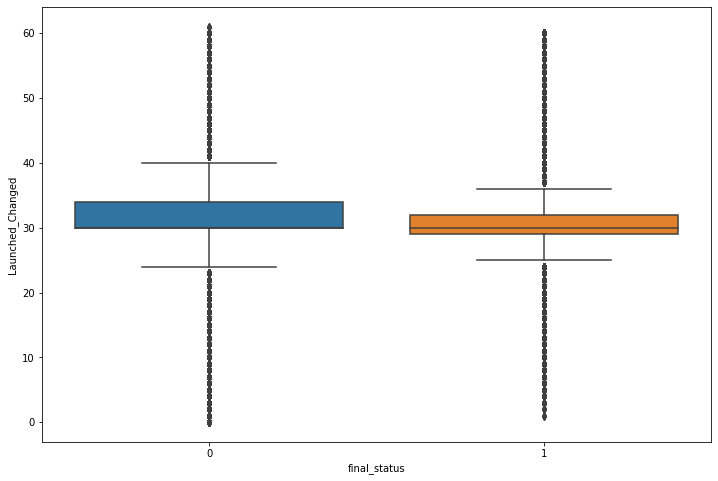

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df['final_status'], y = df['Launched_Changed'])

<AxesSubplot:xlabel='final_status', ylabel='Launched_Changed'>

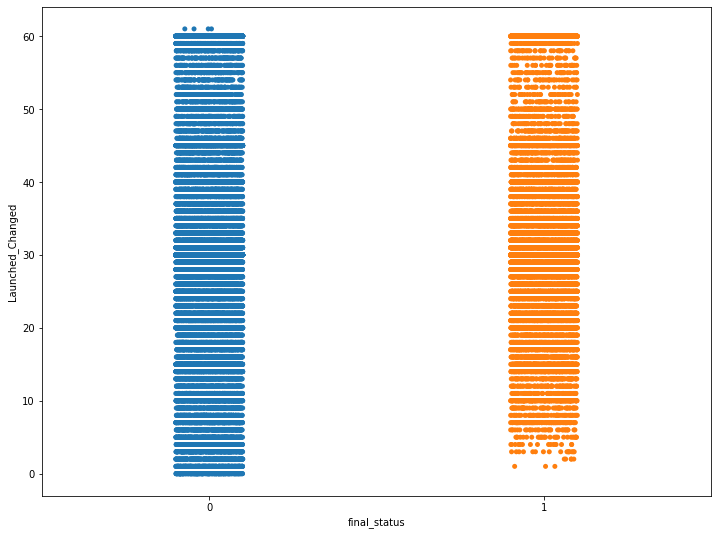

In [54]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'final_status', y = 'Launched_Changed', data = df)

<AxesSubplot:xlabel='final_status', ylabel='backers_count'>

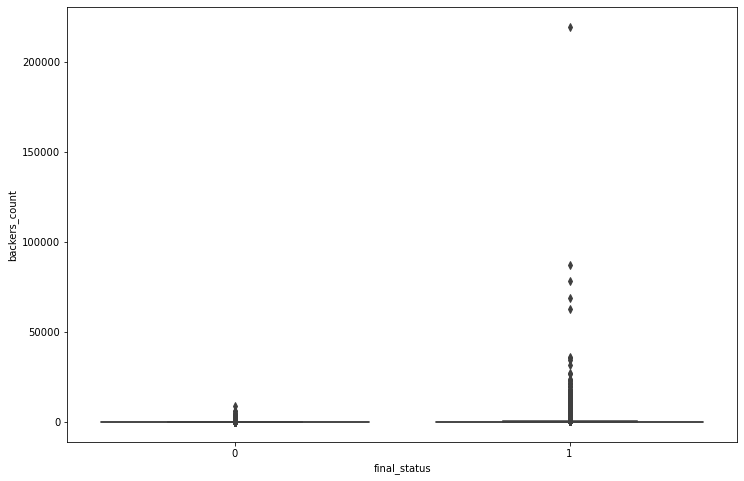

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df['final_status'], y = df['backers_count'])

<AxesSubplot:xlabel='final_status', ylabel='backers_count'>

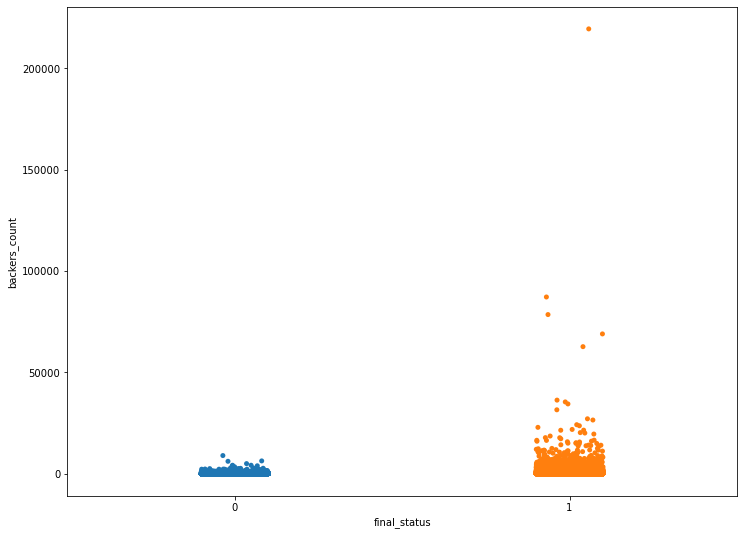

In [56]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'final_status', y = 'backers_count', data = df)

In [57]:
df=df[df['backers_count']<=5000]

* Take out a few outliers, taking the initial conditions when each status starts to make a difference

In [58]:
df.shape

(87542, 22)

In [59]:
df.describe()

,goal,backers_count,final_status,Create_Launched,Launched_Changed,Launched_Deadline,Changed_Deadline,year,goal_usd
count,8.754200e+04,87542.000000,87542.000000,87542.000000,87542.000000,87542.000000,87542.000000,87542.000000,87542.000000
mean,1.780987e+04,98.513114,0.307372,38.783898,31.606566,32.619645,1.014747,2013.614596,17046.642866
std,5.162005e+04,317.190014,0.461408,77.968074,11.737889,10.941118,4.982938,1.008355,41193.564532
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2012.000000,0.729927
25%,2.000000e+03,2.000000,0.000000,4.000000,30.000000,30.000000,0.000000,2013.000000,2000.000000
50%,5.000000e+03,15.000000,0.000000,12.000000,30.000000,30.000000,0.000000,2014.000000,5000.000000
75%,1.500000e+04,66.000000,1.000000,36.000000,33.000000,34.000000,0.000000,2014.000000,15000.000000
max,3.000000e+06,4974.000000,1.000000,747.000000,61.000000,60.000000,50.000000,2015.000000,500000.000000


In [60]:
df.describe(include='O')

,name,category,main_category,pledged,usd pledged,desc,country,currency,launched_at
count,87534,87542,87542,87542,87305,87510,87542,87542,87542
unique,85378,162,18,23785,34168,85030,11,9,1240
top,New EP/Music Development,Video Games,Film & Video,0,0,Breakout Artist Management has offered to work...,US,USD,2014-07-09
freq,287,4485,14775,10820,10780,267,71760,71760,512


In [61]:
df['Month']=df['launched_at'].str[5:7]

df['Month']=df['Month'].astype(int)

In [62]:
df['name']=df['name'].astype('str')
df['desc']=df['desc'].astype('str')

In [67]:
df_describe =[]

for i in df.columns:
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [68]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

,column,type,nan,nan%,nunique,unique
0,name,object,0,0.00,85379,"[Where is Hank?, Of Jesus and Madmen, The Bear..."
1,category,object,0,0.00,162,"[Narrative Film, Nonfiction, Comic Books, Art ..."
2,main_category,object,0,0.00,18,"[Film & Video, Publishing, Comics, Food, Art, ..."
3,pledged,object,0,0.00,23785,"[220, 0, 395, 789, 48, 48905, 21, 1395, 8641.3..."
4,usd pledged,object,237,0.27,34168,"[220, 0, 395, 789, 6.18000816, 43203.2511447, ..."
5,desc,object,0,0.00,85031,"[Abandoned Property. Sounds of struggle, muffl..."
6,goal,float64,0,0.00,3000,"[45000.0, 2500.0, 1500.0, 3000.0, 500.0, 17757..."
7,disable_communication,bool,0,0.00,2,"[False, True]"
8,country,object,0,0.00,11,"[US, CA, NO, GB, AU, NZ, SE, NL, DK, IE, DE]"
9,currency,object,0,0.00,9,"[USD, CAD, NOK, GBP, AUD, NZD, SEK, EUR, DKK]"


In [66]:
df.to_csv("Clean_KS.csv", index=False)